In [1]:
try:
    # import google.colab # type: ignore
    # from google.colab import output
    %pip install transformer-lens matplotlib numpy seaborn torch hf_transfer
except:
    from IPython import get_ipython  # type: ignore

    ipython = get_ipython()
    assert ipython is not None
    ipython.run_line_magic("load_ext", "autoreload")
    ipython.run_line_magic("autoreload", "2")

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Testing grid functions
import json
from grid_functions import *

In [3]:
N_SAMPLES = 500

dataset = make_random_grid_dataset(N_SAMPLES)


In [4]:
dataset_json = json.dumps(dataset, indent=2)

# write to file
with open("data/grid_navigation_dataset.json", "w") as f:
    f.write(dataset_json)

In [5]:
N_SAMPLES = 200

dataset = make_determinist_grid_dataset(N_SAMPLES, agent=(0,0))


In [6]:
dataset_json = json.dumps(dataset, indent=2)

# write to file
with open("data/grid_simple_dataset.json", "w") as f:
    f.write(dataset_json)

In [7]:
text, output = dataset[0]['inputs'], dataset[0]['output']  

In [8]:
print("Sample text input:")
print(text)
print("\nCorresponding output:")
print(output)

Sample text input:
{'simple': '"You are solving a grid navigation task.\\n\\nThe grid is 5x5.\\nCoordinates are (x, y).\\nx increases to the RIGHT.\\ny increases DOWN.\\nThe top-left cell is (0, 0).\\n\\nAgent position: (0, 0)\\nGoal position: (0, 1)\\n\\nReason step by step about the spatial relationship.\\nThen write:\\n\\nACTION:"'}

Corresponding output:
{'agent_grid': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'goal_grid': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


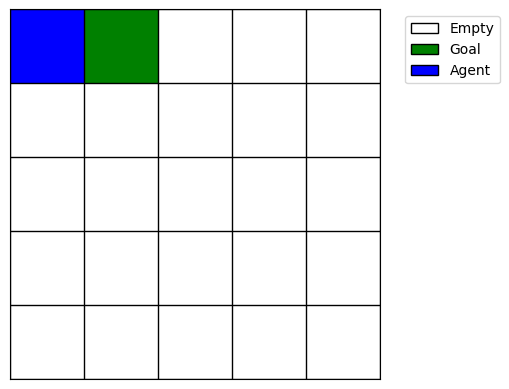

In [9]:
agent_grid = output['agent_grid']
goal_grid = output['goal_grid']
visualize_binary_grid(goal_grid, agent_grid, 5, 5)
